<a href="https://colab.research.google.com/github/Ufoan/portfolio/blob/main/analisis_de_informacion_geografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de paquetes y lectura archivo

In [1]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
!pip install geopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (489 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
pd.set_option('display.max_rows', 100)

df = pd.read_csv("Mineral Ores Around The World Cleaned.csv")

## Análisis exploratorio

In [3]:
df.head(5)

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,prod_size,dev_stat,ore,gangue,work_type,hrock_type,arock_type
0,Red Dog mine,68.07000,-162.83000,NaN,United States,Alaska,NaN,B,"Zinc, Silver, Lead",Barium-Barite,"Gold, Copper, Barium-Barite",Surface-Underground,NaN,Producer,"Barite, Boulangerite, Galena, Marcasite, Polyb...",Quartz,Surface,"Black Shale,Chert",NaN
1,Su-Lik,68.16600,-163.20500,NaN,United States,Alaska,NaN,B,"Zinc, Silver, Lead","Cadmium, Barium-Barite","Cadmium, Barium-Barite",Surface-Underground,NaN,Prospect,"Boulangerite, Bournonite, Galena, Marcasite, P...","Calcite, Dolomite",Surface,Sandstone,Mudstone
2,Many Values Pegmatite Prospect,41.04952,-106.17495,NaN,United States,Wyoming,Albany,B,"Mica, Beryllium, Tantalum","Garnet, REE, Niobium (Columbium)",Uranium,Surface,S,Past Producer,"Beryl, Tantalite, Muscovite",NaN,Underground,Pegmatite,"Schist,Gneiss"
3,Democrat Hill deposit,38.10472,-105.36139,NaN,United States,Colorado,Custer,B,"Potassium, Silver, Aluminum, Gold","Lead, Zinc",NaN,Underground,N,Past Producer,"Alunite, Diaspore, Kaolinite, Pyrite, Galena, ...",Quartz,Surface/Underground,Rhyolite,Rhyolite
4,Adobe Walls Mine,29.47333,-103.55222,NaN,United States,Texas,Brewster,M,Mercury,NaN,Uranium,Underground,S,Past Producer,"Carnotite, Cinnabar","Calcite, Gypsum",Underground,Limestone,Trachyandesite


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site_name   3125 non-null   object 
 1   latitude    3125 non-null   float64
 2   longitude   3125 non-null   float64
 3   region      1065 non-null   object 
 4   country     3125 non-null   object 
 5   state       2630 non-null   object 
 6   county      1779 non-null   object 
 7   com_type    3112 non-null   object 
 8   commod1     3125 non-null   object 
 9   commod2     967 non-null    object 
 10  commod3     1228 non-null   object 
 11  oper_type   3125 non-null   object 
 12  prod_size   1023 non-null   object 
 13  dev_stat    3125 non-null   object 
 14  ore         1006 non-null   object 
 15  gangue      867 non-null    object 
 16  work_type   3125 non-null   object 
 17  hrock_type  1132 non-null   object 
 18  arock_type  552 non-null    object 
dtypes: float64(2), object(17)
m

In [5]:
df.duplicated().sum()

2

In [6]:
duplicados = df[df.duplicated()]

In [7]:
duplicados

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,prod_size,dev_stat,ore,gangue,work_type,hrock_type,arock_type
2245,Gidjurska,41.36540,25.11847,EU,Bulgaria,Plovdiv,NaN,M,"Zinc, Lead",NaN,"Silver, Copper",Underground,NaN,Producer,NaN,NaN,Underground,NaN,NaN
2868,Almaden,38.46927,-4.49818,EU,Spain,NaN,NaN,M,Mercury,NaN,NaN,Underground,NaN,Producer,NaN,NaN,"Surface, Underground",NaN,NaN


In [8]:
df.isna().sum()

site_name        0
latitude         0
longitude        0
region        2060
country          0
state          495
county        1346
com_type        13
commod1          0
commod2       2158
commod3       1897
oper_type        0
prod_size     2102
dev_stat         0
ore           2119
gangue        2258
work_type        0
hrock_type    1993
arock_type    2573
dtype: int64

In [9]:
df.isnull().sum()

site_name        0
latitude         0
longitude        0
region        2060
country          0
state          495
county        1346
com_type        13
commod1          0
commod2       2158
commod3       1897
oper_type        0
prod_size     2102
dev_stat         0
ore           2119
gangue        2258
work_type        0
hrock_type    1993
arock_type    2573
dtype: int64

## Desarrollo

### 1. Crear mapa con la ubicación de cada uno de los centros de explotación, que tenga un mapa base (puede sr cualquiera: Google, OpenStreet Maps o cualquier otro) y que utilice una clasificación de colores para cada mina que permita diferenciar los tipos de operación que existen (variable oper_type). ¿Qué conclusiones puede sacar del mapa creado?

En primer lugar buscamos los valores únicos de *oper_type* para poder crear el diccionario con los colores asociados a cada tipo de operación.

In [4]:
#buscamos los valores únicos de oper_type para poder asociar colores
df['oper_type'].value_counts()

Underground            1523
Surface                1135
Surface-Underground     357
Placer                   79
Well                     16
Processing Plant          6
Brine Operation           4
Leach                     3
Offshore                  2
Name: oper_type, dtype: int64

Creamos el diccionario asociando tipo de operación - color:

In [5]:
# Diccionario de mapeo de tipos de operación a colores
colores = {'Underground': 'blue', 'Surface': 'green', 'Surface-Underground': 'red', 'Placer': 'yellow', 'Well': 'orange', 'Processing Plant': 'purple', 'Brine Operation': 'cyan', 'Leach': 'magenta','Offshore':'gray'}


Creamos el mapa utilizando geopandas para ubicar un mapa debajo. en este caso importamos el mapa "naturalearth":

<ipython-input-6-4f06aac72644>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


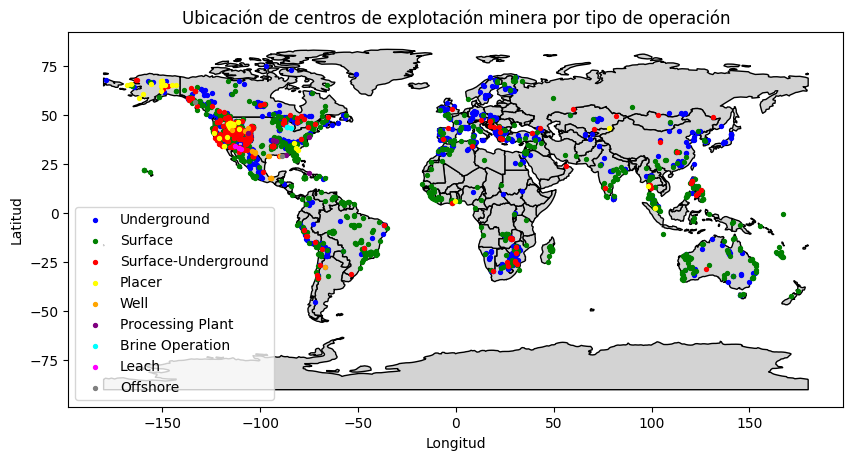

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')

for oper_type, color in colores.items():
    subset = df[df['oper_type'] == oper_type]
    ax.scatter(subset['longitude'], subset['latitude'], color=color, label=oper_type, s=8)

plt.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de centros de explotación minera por tipo de operación')

plt.show()


Observando el mapa podemos concluir que en america latina predominan las operaciones superficiales, en cambio estados unidos existe una mayoría de minas con operaciones mixtas (superficiales y bajo tierra). Las operaciones bajo tierra tienen un una predominancia en Europa.

### 2. ¿Con qué sistema de coordenadas creó el mapa? ¿Tuvo que hacer alguna conversión de coordenadas para crear el mapa?

Cree el mapa utilizando las coordenadas geográficas terrestres (longitud y latitud, que dentro del dataframe aparecen como "longitude" y "latitude"). No tuve necesidad de hacer conversión de coordenadas porque geopandas utiliza también estas coordenadas de base.

### 3. Utilizando la columna commod1, identifique la frecuencia relativa de los minerales extraídos en los centros de explotación (considerar minerales de forma individual, separando cuando se extrae más de 1 mineral de 1 mina)

En primer lugar buscamos los valores únicos de la columna *commod1*, esto para conocer el tipo de entrada que se tiene en la columna.

In [7]:
#buscamos los valores únicos de commod1
df['commod1'].value_counts()

Gold                                358
Copper                              325
Iron                                236
Phosphorus-Phosphates               180
Aluminum                            140
                                   ... 
Cobalt, Zinc, Gold, Copper            1
Silica                                1
Silver, Cobalt, Nickel, Platinum      1
Zinc, Tin, Silver                     1
Asbestos, Talc-Soapstone              1
Name: commod1, Length: 264, dtype: int64

Como menciona el enunciado, hay entradas que consideran más de un mineral; por esta razón debemos en estos casos separar la entrada y considerar cada mineral mencionado por separado. Para lograr lo anterior definiremos un programa donde se creará una lista inicial vacía y se irá agregando cada entrada de la columna. En caso de existir una coma (,) el programa separará los tipos de minerales y los anexará a la lista por separado. Así para al final calcular la frecuencia relativa, contaremos los valores y normalizaremos.

In [8]:
def calcular_frecuencia_minerales(x):
  #La función tiene como entrada un dataframe y salida una serie, para que funcione necesitamos que el dataframe tenga un nombre asociado. Esto será útil para la siguiente pregunta mas que para esta.
    todos_los_minerales = []
    #Recorremos el DataFrame de entrada 'x' y extraemos los minerales
    for index, row in x.iterrows():
        mineral = row['commod1'].split(', ') if isinstance(row['commod1'], str) else []
        todos_los_minerales.extend(mineral)

    #Creamos un DataFrame con los minerales
    minerals_df = pd.DataFrame({'mineral': todos_los_minerales})

    #Calculamos la frecuencia relativa de los minerales
    frecuencia_relativa = minerals_df['mineral'].value_counts(normalize=True)
    max_frecuencia = frecuencia_relativa.max
    #Devolvemos los resultados
    print(f"Las frecuencias relativas de los minerales para {x.name} son:")
    print(frecuencia_relativa)

In [9]:
#Le damos un nombre a nuestro dataframe para poder utilizar la función
df.name = 'todas las operaciones'

In [10]:
calcular_frecuencia_minerales(df)

Las frecuencias relativas de los minerales para todas las operaciones son:
Copper                   0.132633
Gold                     0.129702
Silver                   0.088178
Lead                     0.076209
Zinc                     0.075965
Iron                     0.061065
Phosphorus-Phosphates    0.044944
Aluminum                 0.035173
Tungsten                 0.033219
Nickel                   0.030532
Mercury                  0.027601
Chromium                 0.025892
Tin                      0.022716
Barium-Barite            0.021983
Fluorine-Fluorite        0.021006
Uranium                  0.014900
Molybdenum               0.014656
Titanium                 0.012946
Graphite                 0.010503
Antimony                 0.010015
Manganese                0.007572
Cobalt                   0.006839
REE                      0.006595
Sulfur                   0.006351
Platinum                 0.005862
Potassium                0.005618
Vanadium                 0.004885
Zirconi

### 4. ¿Hay alguna relación entre el tipo de operación *oper_type* y el tipo de mineral extraído *commod1*?

Para responder esta pregunta pensé inicialmente en utilizar visualizaciones, pero con los datos sin procesar no estaba muy segura de cómo graficar sin obtener sólo una mancha negra, por la cantidad de datos distintos. Por eso pensé en primero calcular la frecuencia relativa de los minerales para cada tipo de operación. Para esto defini inicialmente distintos dataframes con sus respectivos nombres:

In [11]:
underground_min = df[df['oper_type']=='Underground']
underground_min.name = 'underground_min'
surface_min = df[df['oper_type']=='Surface']
surface_min.name = 'surface_min'
sur_und_min = df[df['oper_type']=='Surface-Underground']
sur_und_min.name = 'sur_und_min'
placer_min = df[df['oper_type']=='Placer']
placer_min.name = 'placer_min'
well_min = df[df['oper_type']=='Well']
well_min.name = 'well_min'
processing_plant_min = df[df['oper_type']=='Processing Plant']
processing_plant_min.name = 'processing_plant_min'
brine_op_min = df[df['oper_type']=='Brine Operation']
brine_op_min.name = 'brine_op_min'
leach_min = df[df['oper_type']=='Leach']
leach_min.name = 'leach_min'
offshore_min = df[df['oper_type']=='Offshore']
offshore_min.name = 'offshore_min'

Calculamos la frecuencia relativa de los minerales para cada tipo de operación:

In [12]:
tipos_operaciones = [underground_min,surface_min,sur_und_min,placer_min,well_min,processing_plant_min,brine_op_min,leach_min,offshore_min]

In [13]:
for operaciones in tipos_operaciones:
  calcular_frecuencia_minerales(operaciones)

Las frecuencias relativas de los minerales para underground_min son:
Copper                   0.156599
Gold                     0.152881
Silver                   0.131041
Lead                     0.125000
Zinc                     0.121747
Tungsten                 0.041357
Iron                     0.033922
Nickel                   0.024628
Chromium                 0.023699
Fluorine-Fluorite        0.022770
Mercury                  0.018587
Uranium                  0.014870
Antimony                 0.014870
Tin                      0.013011
Molybdenum               0.010688
Phosphorus-Phosphates    0.010223
Barium-Barite            0.009294
Platinum                 0.008829
Potassium                0.008364
Vanadium                 0.006506
Manganese                0.006041
Cobalt                   0.005112
Aluminum                 0.004647
Graphite                 0.003717
Palladium                0.003253
Sulfur                   0.002788
Thorium                  0.002788
Asbestos     

Considerando sólo las frecuencias relativas máximas de cada tipo de operación tenemos:


```
-------------------------------------------------------------
Tipo de Operación | Mineral             | Frecuencia relativa
-------------------------------------------------------------
Underground       |Copper/Gold          |0.15 both
-------------------------------------------------------------
Surface           |Iron                 |0.12
-------------------------------------------------------------
Surf. and und.    |Copper               |0.12
-------------------------------------------------------------
Placer            |Gold                 |0.63
-------------------------------------------------------------
Well              |Sulfur               |0.75
-------------------------------------------------------------
Processing plant  |Magnesite            |0.25
-------------------------------------------------------------
Brine             |Magnesite            |1
-------------------------------------------------------------
Leach             |Copper               |1
-------------------------------------------------------------
Offshore          |Sulfur/Barium-barite |0.5 both
-------------------------------------------------------------
```
De aquí podemos observar en primer lugar que *Brine* y *Leach* operan sólo con un tipo de mineral, magnesita y cobre respectivamente. Además de eso, y aunque no aparece en la tabla resumen, el cobre parece presente en casi todo los tipos de operaciones.




In [14]:
df[df['commod1']=='Copper']['oper_type'].value_counts(normalize=True)

Underground            0.556923
Surface                0.292308
Surface-Underground    0.141538
Leach                  0.009231
Name: oper_type, dtype: float64

In [15]:
df[df['commod1']=='Gold']['oper_type'].value_counts(normalize=True)

Underground            0.583799
Placer                 0.167598
Surface-Underground    0.134078
Surface                0.114525
Name: oper_type, dtype: float64

In [16]:
df['oper_type'].value_counts(normalize=True)

Underground            0.48736
Surface                0.36320
Surface-Underground    0.11424
Placer                 0.02528
Well                   0.00512
Processing Plant       0.00192
Brine Operation        0.00128
Leach                  0.00096
Offshore               0.00064
Name: oper_type, dtype: float64

### 5. Para cada uno de los centros de explotación minera identifique cuál es y cuál es la distancia en km al centro de explotación minera más cercano con un tipo de operación diferente.

In [17]:
from geopy.distance import geodesic #de esta manera podemos calcular la distancia en kilómetros utilizando la información de las coordenadas en latitud y longitud

In [18]:
def calcular_distancia(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

In [19]:
df['site_name'].value_counts()

Badger Mine                  3
Mammoth Mine                 3
Gidjurska                    3
Queen Mine                   3
Unidentified Prospect        3
                            ..
Western Uinta Range Group    1
Peach 1                      1
Big 3                        1
Pete's Tunnel                1
Okolona Road                 1
Name: site_name, Length: 3055, dtype: int64

In [20]:
df[df['site_name']=='Badger Mine']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,prod_size,dev_stat,ore,gangue,work_type,hrock_type,arock_type
331,Badger Mine,45.10767,-116.67850,NaN,United States,Idaho,Adams,M,Copper,NaN,"Silver, Gold",Surface-Underground,S,Past Producer,"Bornite, Chalcocite, Tetrahedrite",Quartz,Underground,Andesite,Andesite
439,Badger Mine,44.37319,-114.67173,NaN,United States,Idaho,Custer,M,Gold,NaN,"Silver, Zinc, Copper, Lead",Underground,S,Past Producer,"Gold, Tetrahedrite","Calcite, Quartz",Underground,Andesite,Andesite
2651,Badger Mine,46.03050,-112.51899,NaN,United States,Montana,Silver Bow,M,"Zinc, Lead, Copper",Silver,NaN,Underground,NaN,Past Producer,NaN,NaN,Underground,NaN,NaN


In [21]:
df[df['site_name']=='Lockwood Mine']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,prod_size,dev_stat,ore,gangue,work_type,hrock_type,arock_type
307,Lockwood Mine,45.13067,-116.6549,NaN,United States,Idaho,Adams,M,Copper,NaN,"Silver, Tungsten, Molybdenum",Underground,S,Past Producer,"Bornite, Chrysocolla, Malachite, Molybdenite","Epidote, Garnet, Hematite",Underground,Skarn (Tactite),Diorite


In [22]:
coord1 = (45,-116)
coord2 = (44,-114)
calcular_distancia(coord1,coord2)

194.02096921534513

In [23]:
def encontrar_centro_mas_cercano(row, df):
    lat = row['latitude'] #definimos las variables
    lon = row['longitude']
    operacion_actual = row['oper_type']
    estado = row['state']
    pais = row['country']
    # Filtramos por operaciones distintas en el mismo estado
    estado_diferente = df[(df['oper_type'] != operacion_actual) & (df['state'] == estado)]

    if len(estado_diferente) > 1:  # Si hay más de una entrada con operación diferente en el estado seguimos, sino pasamos a país
        conjunto_a_considerar = estado_diferente
    else:
        # Filtramos por operaciones distintas en el mismo país
        pais_diferente = df[(df['oper_type'] != operacion_actual) & (df['country'] == pais)]

        if len(pais_diferente) > 1:  # Si hay más de una entrada con operación diferente en el país seguimos, sino saltamos
            conjunto_a_considerar = pais_diferente
        else:
            conjunto_a_considerar = df[df['oper_type'] != operacion_actual]  # Considerar todas las operaciones diferentes, el peor caso

    distancia_minima = float('inf')
    nombre_centro_mas_cercano = None

    # Calculamos distancia a los centros en el conjunto seleccionado
    for idx, row in conjunto_a_considerar.iterrows():
        distancia = calcular_distancia((lat, lon), (row['latitude'], row['longitude']))

        if distancia < distancia_minima:
            distancia_minima = distancia
            nombre_centro_mas_cercano = row['site_name']

    return pd.Series([nombre_centro_mas_cercano, distancia_minima], index=['centro_mas_cercano', 'distancia_minima'])


In [24]:
nuevas_columnas = df.apply(lambda row: encontrar_centro_mas_cercano(row, df), axis=1)
df[['centro_mas_cercano', 'distancia_minima(km)']] = nuevas_columnas

In [25]:
df.head(5)

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,oper_type,prod_size,dev_stat,ore,gangue,work_type,hrock_type,arock_type,centro_mas_cercano,distancia_minima
0,Red Dog mine,68.07000,-162.83000,NaN,United States,Alaska,NaN,B,"Zinc, Silver, Lead",Barium-Barite,...,Surface-Underground,NaN,Producer,"Barite, Boulangerite, Galena, Marcasite, Polyb...",Quartz,Surface,"Black Shale,Chert",NaN,Smucker,254.929857
1,Su-Lik,68.16600,-163.20500,NaN,United States,Alaska,NaN,B,"Zinc, Silver, Lead","Cadmium, Barium-Barite",...,Surface-Underground,NaN,Prospect,"Boulangerite, Bournonite, Galena, Marcasite, P...","Calcite, Dolomite",Surface,Sandstone,Mudstone,Smucker,273.050530
2,Many Values Pegmatite Prospect,41.04952,-106.17495,NaN,United States,Wyoming,Albany,B,"Mica, Beryllium, Tantalum","Garnet, REE, Niobium (Columbium)",...,Surface,S,Past Producer,"Beryl, Tantalite, Muscovite",NaN,Underground,Pegmatite,"Schist,Gneiss",Lake Creek Mines,9.098261
3,Democrat Hill deposit,38.10472,-105.36139,NaN,United States,Colorado,Custer,B,"Potassium, Silver, Aluminum, Gold","Lead, Zinc",...,Underground,N,Past Producer,"Alunite, Diaspore, Kaolinite, Pyrite, Galena, ...",Quartz,Surface/Underground,Rhyolite,Rhyolite,Iron Mountain Mine,1.801409
4,Adobe Walls Mine,29.47333,-103.55222,NaN,United States,Texas,Brewster,M,Mercury,NaN,...,Underground,S,Past Producer,"Carnotite, Cinnabar","Calcite, Gypsum",Underground,Limestone,Trachyandesite,Paisano Mine,9.092842


Así, para cada centro agregamos dos columnas, una llamada "centro_mas_cercano" que indica cuál es el centro más cercano y "distancia_minima(km)" que es es la distancia desde el centro en "site_name" al centro en "centro_mas_cercano" en kms.